In [1]:
from daxryt import data
import numpy as np
from dask.distributed import LocalCluster
import xarray as xr

In [2]:
data.build_test_data(
    n_grids_xyz=(5, 5, 5),
    grid_wids_xyz=np.array([1., 1., 1.]),
    cells_per_grid_xyz=(50, 61, 54),
    output_dir="data",
    clear_output_dir=True, # rm all if exists
    use_dask=False # dont use dask, import race conditions??
)

In [3]:
c = LocalCluster(n_workers=6, threads_per_worker=1)
c

LocalCluster(5b550542, 'tcp://127.0.0.1:37939', workers=6, threads=6, memory=30.94 GiB)

In [24]:
ds_xr = xr.open_mfdataset("data/*.nc")

In [25]:
ds_xr.temperature

<xarray.DataArray 'temperature' (x: 250, y: 305, z: 270)>
dask.array<concatenate, shape=(250, 305, 270), dtype=float64, chunksize=(50, 61, 54), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 0.01 0.03 0.05 0.07 0.09 ... 4.91 4.93 4.95 4.97 4.99
  * y        (y) float64 0.008197 0.02459 0.04098 0.05738 ... 4.959 4.975 4.992
  * z        (z) float64 0.009259 0.02778 0.0463 0.06481 ... 4.954 4.972 4.991

check that the grid is being reconstructed properly

(305, 270)


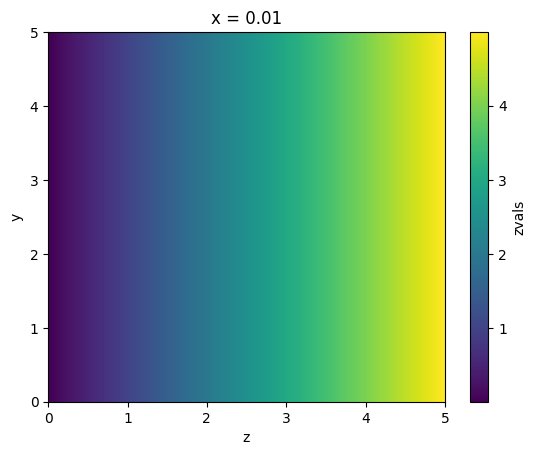

In [26]:
zvals_at_x0 = ds_xr.zvals.isel({"x":0})
print(zvals_at_x0.shape)
zvals_at_x0.plot()

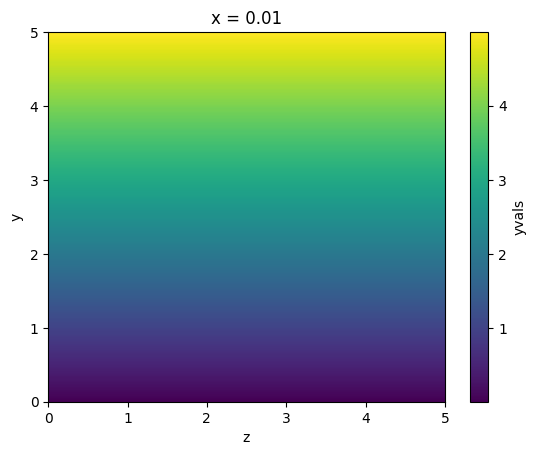

In [27]:
yvals_at_x0 = ds_xr.yvals.isel({"x":0})
yvals_at_x0.plot()

In [28]:
ds_xr.zvals.mean().compute() 
# um. those workers seem to doing nothing.
# something must have changed with dask. 
# maybe that whole processing order job
# submission thing?
# or maybe its an xarray-dask difference
# from normal dask.

<xarray.DataArray 'zvals' ()>
array(2.5)

In [23]:
c.close()